### 결측치 예측 모델

- 결측이 발생하지 않은 컬럼을 바탕으로 결측치를 예측하는 모델 학습하고 활용
- 원본 데이터에서 결측이 포함된 레코드를 일단 제거하고 모델 학습

### 결측치 예측 모델 활용 조건

- 대부분 상황에서 사용 가능 단, 사용 조건 및 단점 존재
    - 단점 : 다른 결측치 처리 방법에 비해 시간이 오래 걸림
    - 결측이 소수의 컬럼에만 쏠려 있으면 안됨
    - 피처 간에 관계가 존재해야 함

## 결측 예측 모델 : sklearn.impute.KNNImputer
- 결측이 아닌 값만 사용해서 이웃을 구한 뒤, 이웃값들의 대표값으로 결측을 대체하는 예측 모델
- 주요 파라미터 : n_neighbors -> 이웃의 범위 수 (5를 사용함)
- 결측치가 없는 곳을 기준으로 거리행렬을 구하고 최단거리 2개 선택(이웃값) 후 평균값으로 대체 

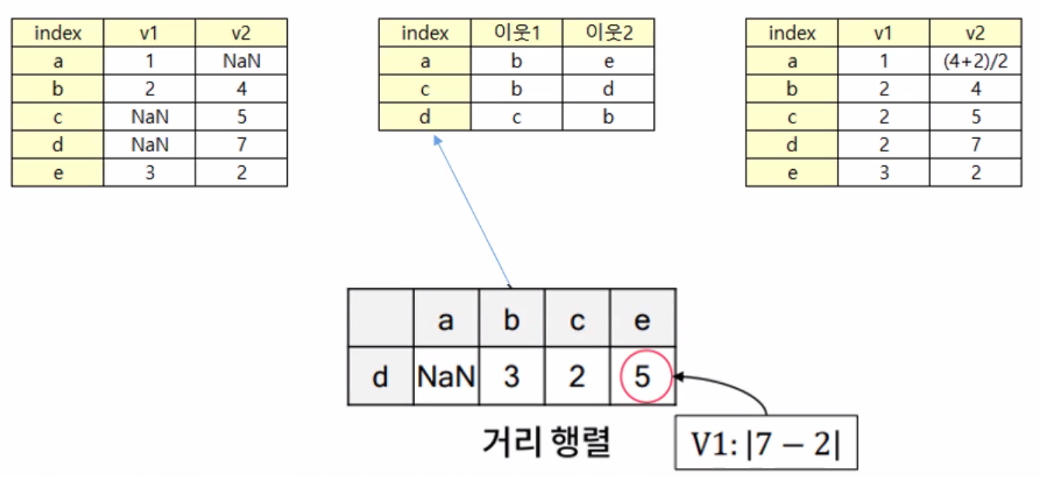

In [4]:
import pandas as pd
import numpy as np
v1 = [1,2,np.nan,np.nan,3]
v2 = [np.nan,4,5,7,2]

df_test = pd.DataFrame({'v1':v1, 'v2':v2})
df_test


,v1,v2
0,1.0,NaN
1,2.0,4.0
2,NaN,5.0
3,NaN,7.0
4,3.0,2.0


In [5]:
from sklearn.impute import KNNImputer

KI = KNNImputer(n_neighbors=5, weights='distance')

# KNN Imputer 학습
KI.fit(df_test)

KNNImputer(weights='distance')

In [6]:
# 결측 대체
df_X = pd.DataFrame(np.round(KI.transform(df_test), 0), columns = df_test.columns)
df_X

,v1,v2
0,1.0,3.0
1,2.0,4.0
2,2.0,5.0
3,2.0,7.0
4,3.0,2.0


## 다른 예제

In [7]:
df = pd.read_csv('./data/mammographic.csv')

In [8]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Output
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [9]:
# 특징과 라벨 분리
X = df.drop('Output', axis = 1)
Y = df['Output']

In [10]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y) # random_state =42 추가 임의로 추출되는 것을 막음

In [11]:
# 열별 결측치 비율 확인 => 그리 높지 않음을 확인
Train_X.isnull().sum() / len(Train_X)

BI-RADS    0.001389
Age        0.001389
Shape      0.033333
Margin     0.058333
Density    0.084722
dtype: float64

In [14]:
# 특징 간 상관계수 확인
Train_X.corr()

,BI-RADS,Age,Shape,Margin,Density
BI-RADS,1.000000,0.266537,0.374672,0.371751,0.080837
Age,0.266537,1.000000,0.369792,0.392403,0.023558
Shape,0.374672,0.369792,1.000000,0.732945,0.088011
Margin,0.371751,0.392403,0.732945,1.000000,0.099149
Density,0.080837,0.023558,0.088011,0.099149,1.000000


In [13]:
# 특징 간 상관계수 확인 => 상관계수 평균 확인 : 40 ~ 50%로 꽤 높은 관련성을 확인
Train_X.corr().sum() / len(Train_X.columns)

BI-RADS    0.418759
Age        0.410458
Shape      0.513084
Margin     0.519250
Density    0.258311
dtype: float64

In [15]:
# KNN Imputer 인스턴스화
from sklearn.impute import KNNImputer
KI = KNNImputer(n_neighbors = 5)

# KNN Imputer 학습
KI.fit(Train_X)

# 결측 대체
Train_X = pd.DataFrame(KI.transform(Train_X), columns = Train_X.columns)


In [16]:
### 새로 들어오는 DATA(Test_X)는 학습된 모델을 사용해서 변환만 해야함
Test_X = pd.DataFrame(KI.transform(Test_X), columns = Test_X.columns)

In [17]:
Train_X.isnull().sum() / len(Train_X)

BI-RADS    0.0
Age        0.0
Shape      0.0
Margin     0.0
Density    0.0
dtype: float64